Oct 11th 2025

## Objective:
Load the UCI ML heart disease dataset, EDA, feature description and develop an understanding of the dataset, its corelations, limitations and create processed dataset to be used by the scikit pipeline.

## Setup

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


import kagglehub

## Loading data

In [4]:
os.environ['KAGGLEHUB_CACHE'] = r'C:\\Users\\patil\\Documents\\GitHub\\ml_projects\\heart_disease_prediction\\data\\raw'

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 12.4k/12.4k [00:00<00:00, 3.16MB/s]

Extracting model files...
Path to dataset files: C:\\Users\\patil\\Documents\\GitHub\\ml_projects\\heart_disease_prediction\\data\\raw\datasets\redwankarimsony\heart-disease-data\versions\6


In [2]:
path_to_dataset = r'C:\\Users\\patil\\Documents\\GitHub\\ml_projects\\heart_disease_prediction\\data\\raw\datasets\redwankarimsony\heart-disease-data\versions\6'
filename = 'heart_disease_uci.csv'
full_file_path = os.path.join(path_to_dataset, filename)
df = pd.read_csv(full_file_path)

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Exploratory Data Analysis

In [4]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [5]:
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == np.number or df[col].dtype == 'int64':
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)
print('numeric:',numeric_cols)
print('categorical:', categorical_cols)

numeric: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
categorical: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


<ipython-input-5-70f3e1486d0a>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype == np.number or df[col].dtype == 'int64':


In [6]:
for col in categorical_cols:
    print(col, df[col].unique())

sex ['Male' 'Female']
dataset ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs [True False nan]
restecg ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang [False True nan]
slope ['downsloping' 'flat' 'upsloping' nan]
thal ['fixed defect' 'normal' 'reversable defect' nan]


### Meaning of some of the technical terms
Dataset: sample collected from different places

CP: chest pain - typical angina (some chest pain), atypical angina (chest pain not clearly related to heart), asymptomatic (no chest pain related to heart), non-anginal (no chest pain)

Trestbps: resting blood pressure (on admission to the hospital)

Chol: cholestrol

FBS - Fasting Blood sugar >=120 mg/dL

Rest ECG: lv hypertrophy (showing probable or definite left ventricular hypertrophy), normal, st-t abnormality (having ST-T 
wave abnormality)

Thalch: maximum heart rate achieved

Exang: Did exercise induce chest pain?

Oldpeak: Change in flow to heart during exercise relative to normal

Slope: Slope of the peak exercise ST segment - downsloping (bad sign), flat (medium sign), upsloping (good sign)

CA: Number of major arteries with with diameter narrowed by >50%

Thal: Thalium stress test - fixed defect (defect present even during rest), normal (no defect), reversable defect (defect only appears during exercise)

Num: Diagnosis of heart disease 0 (no HD), 1 (Mild HD), 2 (Moderate HD), 3 (Severe HD), 4 (Very severe HD)

### First impressions from data features:
This dataset can be classified in 3 types of patients: 
1. no HD
2. some HD but can be reveresed 
3. severe HD

Features that may lead to no HD: nonanginal, fbs False, normal rest ecg, exang False, upsloping, ca 0, thal normal
Features that may lead to some HD: asymptomatic, flat slope, reversable defect
Features that may lead to severe HD: typical angina, fbs True, abnormal rest ecg, exang True, oldpeak high, downsloping, ca 2 or 3,  fixed defect

### Looking at distributions of the features

In [7]:
def plot_feautres(df, file_name):
    n_plots = len(numeric_cols) + len(categorical_cols)
    n_cols = 3
    n_rows = n_plots // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*n_cols, 8*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.histplot(df[col], kde = True, ax = ax, color = 'skyblue')
        ax.set_title(f'Distribution of {col}', fontsize = 12)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
    for i, col in enumerate(categorical_cols):
        ax = axes[i+ len(numeric_cols)]
        val_counts = df[col].value_counts()
        sns.barplot(x = val_counts.index, y = val_counts.values, ax = ax, color = 'lightpink')
        ax.set_title(f'Distribution of {col}', fontsize = 12)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    
    for i in range(n_plots, n_cols*n_rows):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig(file_name)    

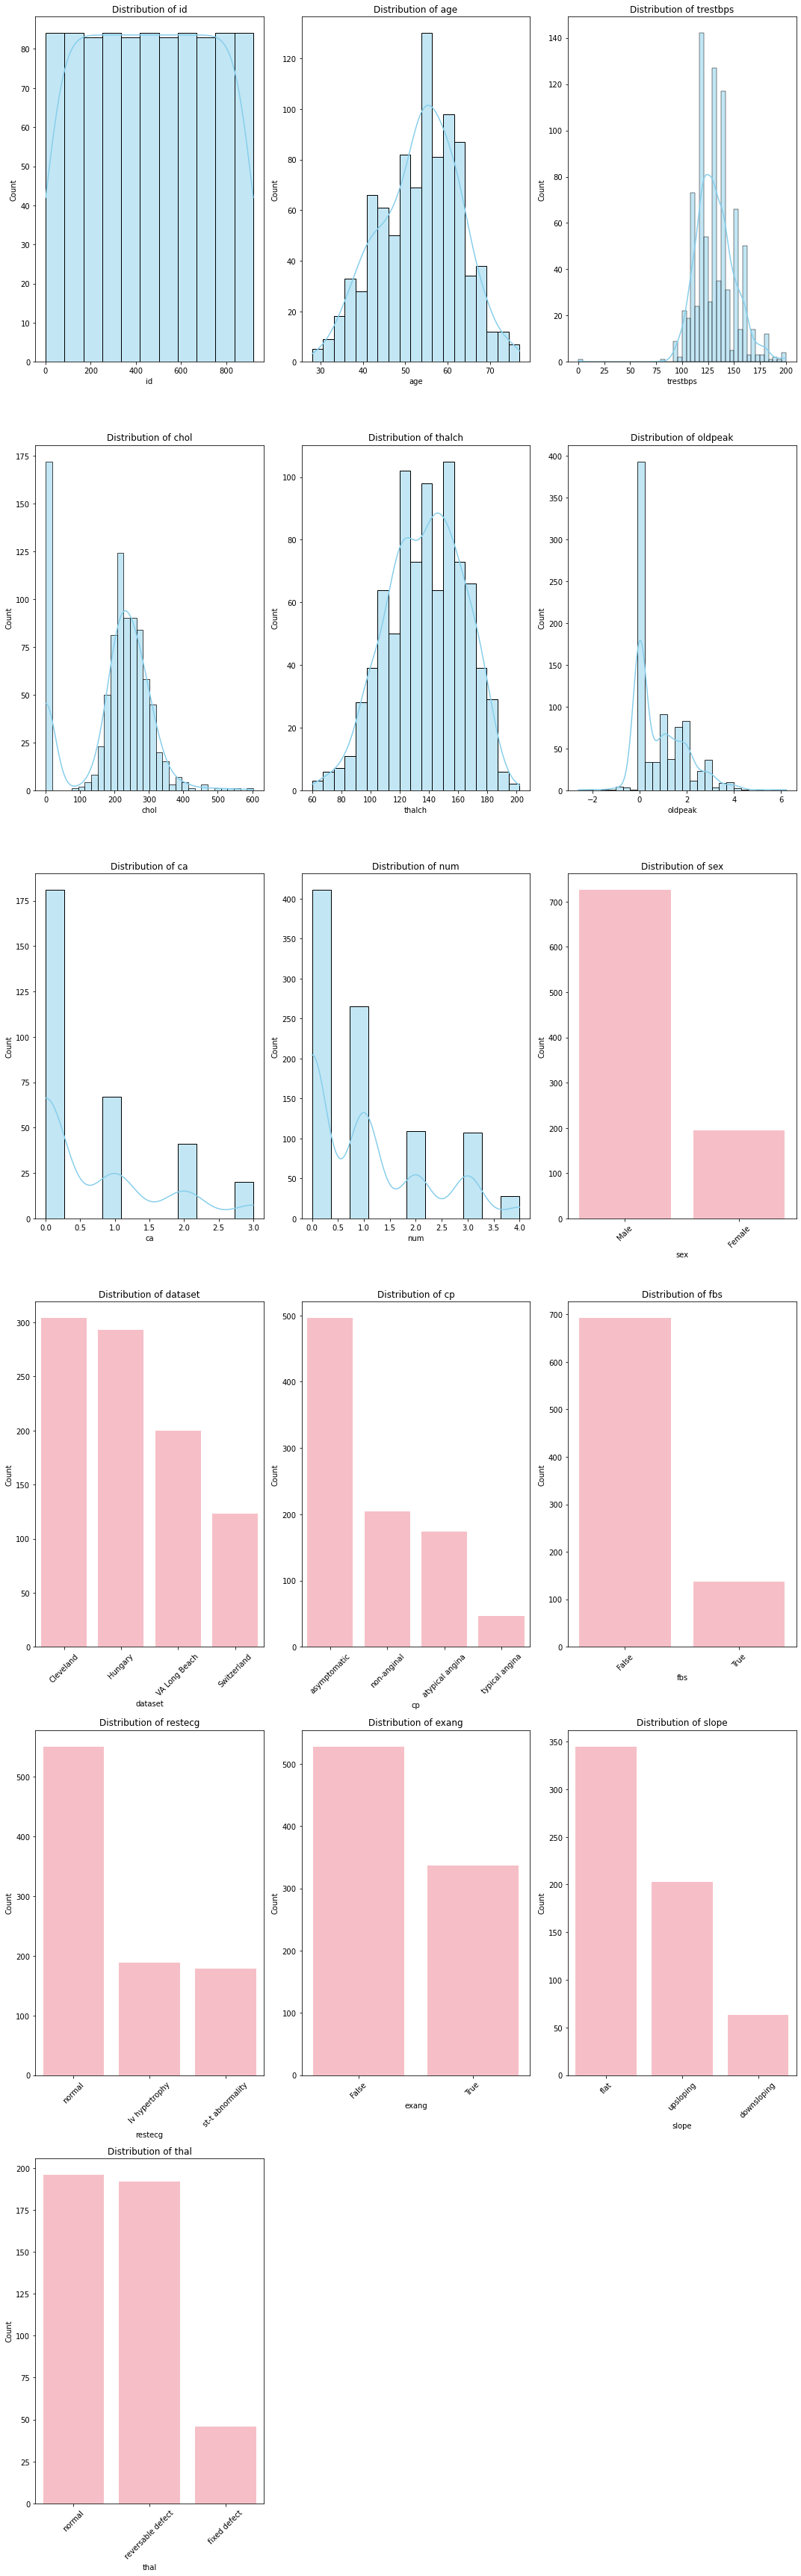

In [8]:
folder_path = r'C:\\Users\\patil\\Documents\\GitHub\\ml_projects\\heart_disease_prediction\\data\\processed'
filename = 'feature_distributions.jpeg'
full_file_path = os.path.join(folder_path, filename)
plot_feautres(df, file_name=full_file_path)

### Findings from the feature plots:
1. chol reported as 0 is actually missing values
2. ca is a discreet but numeric variable, but we'll let it be continuous since its ordered

In [9]:
df['chol'] = df['chol'].replace(0, np.nan)

### Plotting output by each feature

In [10]:
def plot_features_by_target(df, target_col, numeric_cols, categorical_cols, filename):
    n_plots = len(numeric_cols) + len(categorical_cols)
    n_cols = 3
    n_rows = n_plots // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*n_cols, 8*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.boxplot(x = target_col, y = col, data = df, ax = ax, color = 'skyblue')
        ax.set_title(f'Distribution of {col} (0=No HD, 1=HD)', fontsize = 12)
        ax.set_xlabel(col)
        
    for i, col in enumerate(categorical_cols):
        ax = axes[i+ len(numeric_cols)]
        proportions = pd.crosstab(df[col], df[target_col], normalize='index')
        proportions.plot(kind = 'bar', stacked = True, ax = ax, color=['lightcoral', 'skyblue'])
        ax.set_title(f'Heart disease % by {col}', fontsize = 12)
        ax.set_xlabel(col)
        ax.set_ylabel('% with HD')
        ax.tick_params(axis='x', rotation=45)
    
    for i in range(n_plots, n_cols*n_rows):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig(filename)    

In [11]:
hd = df['num'] > 0
df.loc[hd, 'num'] = 1

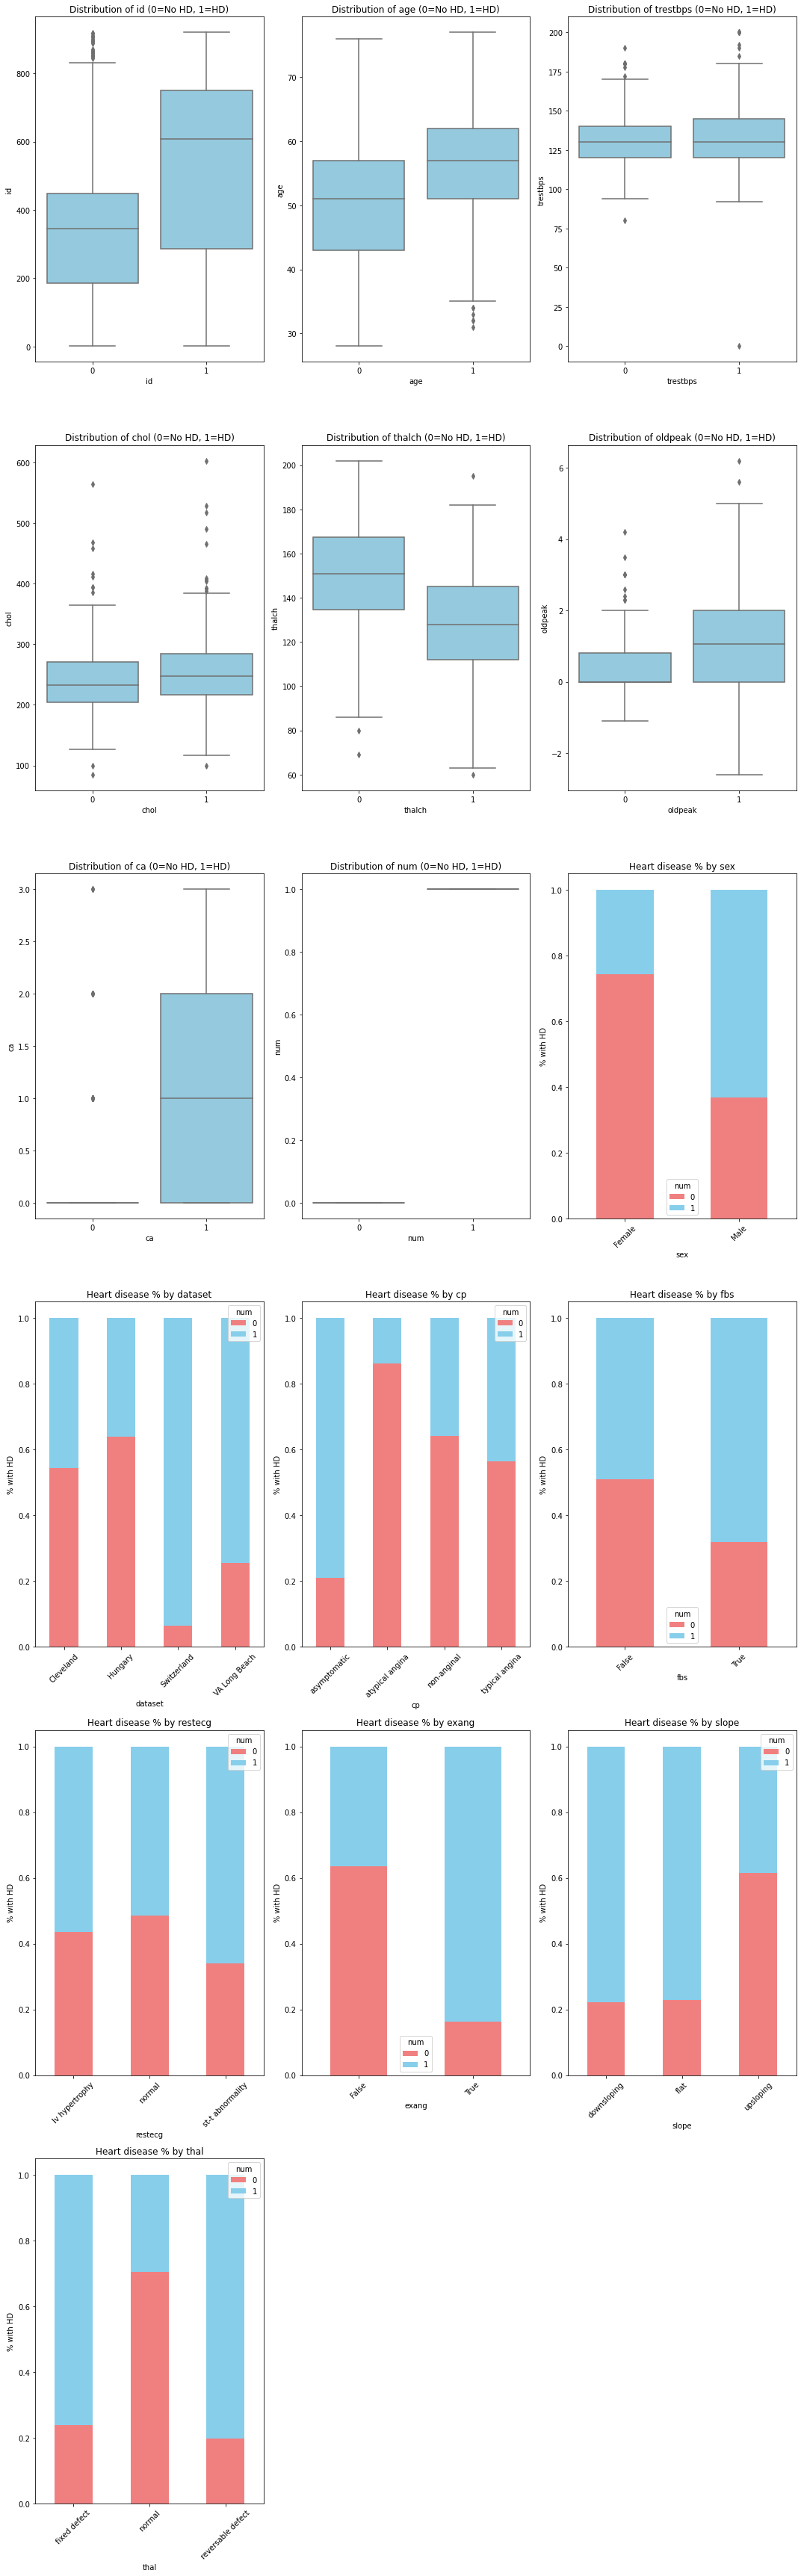

In [12]:
filename = 'feature_distributions_by_target.jpeg'
full_file_path = os.path.join(folder_path, filename)
plot_features_by_target(df, 'num', numeric_cols, categorical_cols, filename=full_file_path)

Most relationships assumed hold true
Patients with lower ID have much less probability of HD than ones in the later part of data. This coult be due to datasets having different prob of HD. Its important to sort this data before train test split 

## Handling missing values
knn for numeric cols and mode imputation for categorical. Both splits should ideally be done after split, but doing the categorical imputation before to get semi-processed data. Numerical value imputation would later be done in sci-kit pipeline while fitting models.

In [13]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [14]:
def impute_group_mode(series):
    mode_value = series.mode()
    if mode_value.empty:
        return series.fillna('MISSING_GROUP_MODE')
    return series.fillna(mode_value.iloc[0])

In [15]:
cat_cols_to_impute1 = ['fbs', 'restecg', 'exang']
cat_cols_to_impute2 = ['slope', 'thal']

In [16]:
for col in cat_cols_to_impute1:
    df[col] = df.groupby(['age', 'sex'])[col].transform(impute_group_mode)
for col in cat_cols_to_impute2:
    df[col] = df.groupby(['sex'])[col].transform(impute_group_mode)

In [17]:
df.duplicated().sum()

0

## Handling outliers

In [18]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 2 * iqr
upper_bound = q3 + 2 * iqr

In [19]:
outlier_mask = (df < lower_bound) | (df > upper_bound)
outlier = outlier_mask.sum()
outlier

age           0
ca            0
chol         10
cp            0
dataset       0
exang         0
fbs         141
id            0
num           0
oldpeak       3
restecg       0
sex           0
slope         0
thal          0
thalch        0
trestbps      9
dtype: int64

### Findings on outliers:
1. changed to 2 iqr outside extremes to account for some wide dists
2. 10 patients have very high chol, however this is signal not noise, keeping it.
3. All True fbs are classified as outliers. This is not right
4. Oldpeak and trestbps can similarly be singal not noise

Keeping all the outliers as is, since they have much less impact on classification models

In [20]:
lower_bound, upper_bound

(id         -688.25
 age          21.00
 trestbps     80.00
 chol         76.50
 fbs           0.00
 thalch       46.00
 exang        -2.00
 oldpeak      -3.00
 ca           -2.00
 num          -2.00
 dtype: float64,
 id          1609.25
 age           86.00
 trestbps     180.00
 chol         410.25
 fbs            0.00
 thalch       231.00
 exang          3.00
 oldpeak        4.50
 ca             3.00
 num            3.00
 dtype: float64)

In [21]:
df.loc[outlier_mask['oldpeak'], 'oldpeak']

91     6.2
123    5.6
589    5.0
Name: oldpeak, dtype: float64

In [22]:
df['fbs'].value_counts()

False    779
True     141
Name: fbs, dtype: int64

## Checking for target class imbalance

In [34]:
class_counts = df['num'].value_counts()
print("Class Counts:\n", class_counts)

class_proportions = df['num'].value_counts(normalize=True) * 100
print("\nClass Proportions:\n", class_proportions)

Class Counts:
 1    509
0    411
Name: num, dtype: int64

Class Proportions:
 1    55.326087
0    44.673913
Name: num, dtype: float64


Dataset is fairly balanced since this is a hospital sample, not population sample

## Getting correlation

In [38]:
numeric_features_for_correlation = list(set(numeric_cols) - set(['id', 'num']))
numeric_features_for_correlation

['thalch', 'ca', 'oldpeak', 'trestbps', 'age', 'chol']

In [40]:
corr_matrix = df[numeric_features_for_correlation].corr()
corr_matrix

,thalch,ca,oldpeak,trestbps,age,chol
thalch,1.000000,-0.264094,-0.151174,-0.104899,-0.365778,-0.047186
ca,-0.264094,1.000000,0.281817,0.093705,0.370416,0.127798
oldpeak,-0.151174,0.281817,1.000000,0.161908,0.258243,0.046960
trestbps,-0.104899,0.093705,0.161908,1.000000,0.244253,0.088763
age,-0.365778,0.370416,0.258243,0.244253,1.000000,0.083326
chol,-0.047186,0.127798,0.046960,0.088763,0.083326,1.000000


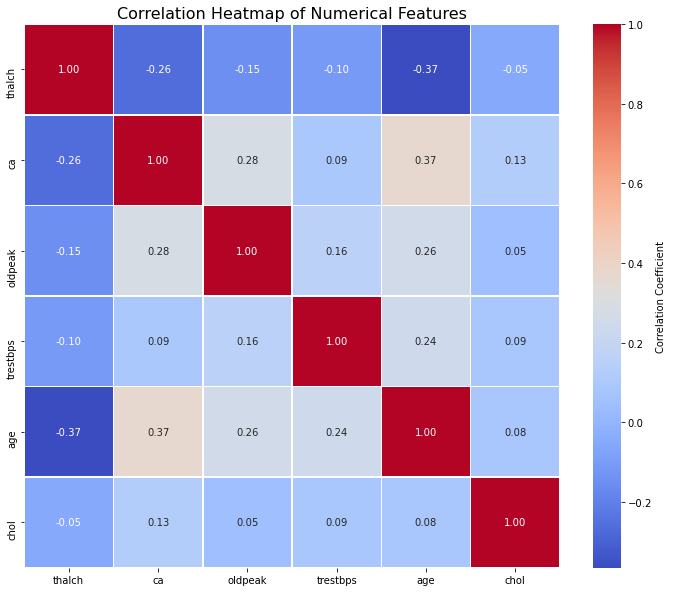

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # Show the correlation values on the map
    fmt=".2f",           # Format the values to two decimal places
    cmap='coolwarm',     # Color map (coolwarm is good for showing positive/negative correlation)
    linewidths=.5,       # Add lines between cells for clarity
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

Strongest correlation is between age and thalch (-0.37) and age and ca (0.37) although both are relatively mild correlations, while this might cause some feature importance impact in logistic regression, this might not warrant dropping features

## Encoding categorical cols

In [23]:
df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['fbs'] = np.where(df['fbs'] == True, 1, 0)
df['exang'] = np.where(df['exang'] == True, 1, 0)

In [24]:
encoding_cat_cols =  [ 'cp', 'restecg', 'slope', 'thal']

In [28]:
df = pd.get_dummies(df, columns=encoding_cat_cols)
df

,id,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,1,Cleveland,145.0,233.0,1,150.0,0,2.3,...,1,1,0,0,1,0,0,1,0,0
1,2,67,1,Cleveland,160.0,286.0,0,108.0,1,1.5,...,0,1,0,0,0,1,0,0,1,0
2,3,67,1,Cleveland,120.0,229.0,0,129.0,1,2.6,...,0,1,0,0,0,1,0,0,0,1
3,4,37,1,Cleveland,130.0,250.0,0,187.0,0,3.5,...,0,0,1,0,1,0,0,0,1,0
4,5,41,0,Cleveland,130.0,204.0,0,172.0,0,1.4,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,VA Long Beach,127.0,333.0,1,154.0,0,0.0,...,0,0,0,1,0,1,0,0,1,0
916,917,62,1,VA Long Beach,NaN,139.0,0,NaN,1,NaN,...,1,0,0,1,0,1,0,0,0,1
917,918,55,1,VA Long Beach,122.0,223.0,1,100.0,0,0.0,...,0,0,0,1,0,1,0,1,0,0
918,919,58,1,VA Long Beach,NaN,385.0,1,NaN,0,NaN,...,0,1,0,0,0,1,0,0,0,1


In [29]:
sorted(df_encoded.columns.to_list())

['age',
 'ca',
 'chol',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'dataset',
 'exang',
 'fbs',
 'id',
 'num',
 'oldpeak',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'sex',
 'slope_downsloping',
 'slope_flat',
 'slope_upsloping',
 'thal_fixed defect',
 'thal_normal',
 'thal_reversable defect',
 'thalch',
 'trestbps']

In [30]:
df = df.drop(['id','dataset'], axis = 1)
df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,1,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1,154.0,0,0.0,NaN,1,...,0,0,0,1,0,1,0,0,1,0
916,62,1,NaN,139.0,0,NaN,1,NaN,NaN,0,...,1,0,0,1,0,1,0,0,0,1
917,55,1,122.0,223.0,1,100.0,0,0.0,NaN,1,...,0,0,0,1,0,1,0,1,0,0
918,58,1,NaN,385.0,1,NaN,0,NaN,NaN,0,...,0,1,0,0,0,1,0,0,0,1


In [31]:
df.describe()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
count,920.000000,920.000000,861.000000,718.000000,920.000000,865.000000,920.000000,858.000000,309.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,132.132404,246.832869,0.153261,137.545665,0.385870,0.878788,0.676375,0.553261,...,0.050000,0.204348,0.601087,0.194565,0.068478,0.710870,0.220652,0.050000,0.303261,0.646739
std,9.424685,0.408148,19.066070,58.527062,0.360435,25.926276,0.487065,1.091226,0.935653,0.497426,...,0.218063,0.403444,0.489941,0.396081,0.252702,0.453605,0.414912,0.218063,0.459917,0.478243
min,28.000000,0.000000,0.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,210.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,239.500000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,1.000000,140.000000,276.750000,0.000000,157.000000,1.000000,1.500000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Pre-processed data ready

In [43]:
filename = 'processed_data.csv'
full_file_path = os.path.join(folder_path, filename)
df.to_csv(full_file_path, index=False)

In [33]:
folder_path

'C:\\\\Users\\\\patil\\\\Documents\\\\GitHub\\\\ml_projects\\\\heart_disease_prediction\\\\data\\\\processed'

## Things to consider for modeling
1. Impute numerical variables in the pipeline at the time of cross validation using knn.
2. Strongest correlation is between age and thalch (-0.37) and age and ca (0.37) although both are relatively mild correlations, while this might cause some feature importance impact in logistic regression, this might not warrant dropping features
3. There are some outliers in data but given that we will use classification algorithms, the outliers are kept.

In [42]:
df

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,1,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,127.0,333.0,1,154.0,0,0.0,NaN,1,...,0,0,0,1,0,1,0,0,1,0
916,62,1,NaN,139.0,0,NaN,1,NaN,NaN,0,...,1,0,0,1,0,1,0,0,0,1
917,55,1,122.0,223.0,1,100.0,0,0.0,NaN,1,...,0,0,0,1,0,1,0,1,0,0
918,58,1,NaN,385.0,1,NaN,0,NaN,NaN,0,...,0,1,0,0,0,1,0,0,0,1
